<a href="https://colab.research.google.com/github/victorjoseij/Natural_language_processing/blob/main/Sentiment_Analysis3_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
df=pd.read_csv('/content/HateSpeechDatasetBalanced.csv')

In [ ]:
df.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [ ]:
df.tail()

,Content,Label
726114,i mute this telecasting and played kanye west ...,1
726115,but hell yeah he s not a bachelor but looooooo...,1
726116,great video musician but s not my musician lol...,1
726117,not great pop video yeah he s not a pedophile ...,1
726118,great video yeah he s non a paedophile lolllll...,1


In [ ]:
df.columns

Index(['Content', 'Label'], dtype='object')

In [ ]:
df.shape

(726119, 2)

In [ ]:
df.isnull().sum()

Content    0
Label      0
dtype: int64

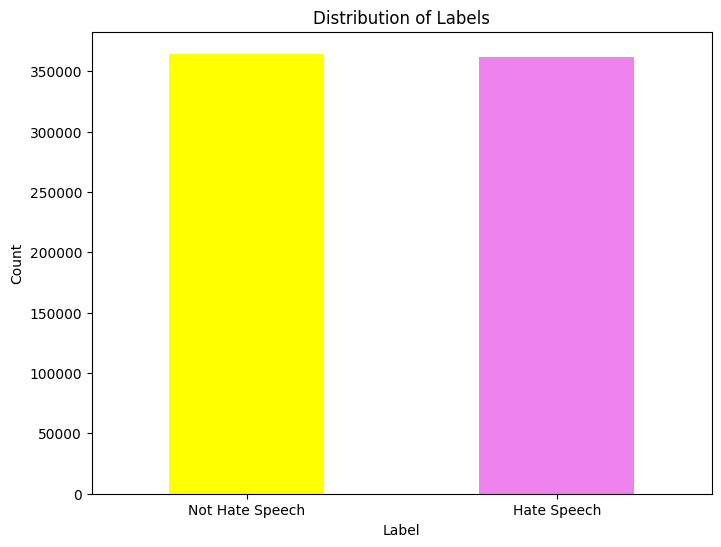

In [ ]:
#ploting the diffrenence between the not hate speach and hate speach
import matplotlib.pyplot as plt

label_counts = df['Label'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['yellow', 'violet'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Hate Speech', 'Hate Speech'], rotation=0)
plt.show()

In [ ]:
df.sample(30)

,Content,Label
555932,ahhh... trump s feelings get hurt too that it ...,1
444029,trust me when i say... that jesuschrist suppos...,1
490707,gypsies should not deny believing,1
226691,hello and thank you for your request at files ...,0
130352,i do not want to settle for darkies are human ...,1
707970,i make up just helping the reader of wikipedia...,1
163412,history of azerbaijan hi whatever are having s...,0
493109,their disdainful attitude constantly makes me ...,1
227302,kiss thought arabic by dimitri guts the chapte...,0
416710,congratulations style solid lightsteelblue bac...,0


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text
df['Content'] = df['Content'].apply(preprocess_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['Content'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7655415082906407


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76     72043
           1       0.77      0.76      0.77     73181

    accuracy                           0.77    145224
   macro avg       0.77      0.77      0.77    145224
weighted avg       0.77      0.77      0.77    145224



In [ ]:
def predict_hate_speech(sentence):
    preprocessed_sentence = preprocess_text(sentence)
    sentence_vectorized = tfidf_vectorizer.transform([preprocessed_sentence])
    prediction = model.predict(sentence_vectorized)
    if prediction[0] == 1:
        return "Hate Speech"
    else:
        return "Not Hate Speech"

input_sentence = input("Enter a sentence: ")

prediction = predict_hate_speech(input_sentence)
print("Prediction:", prediction)

Enter a sentence: 0
Prediction: Not Hate Speech


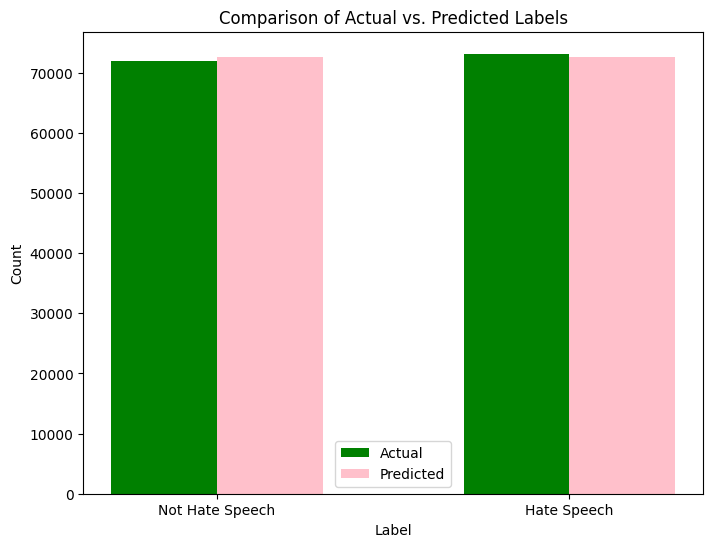

In [ ]:
plt.figure(figsize=(8, 6))

actual_label_counts = np.bincount(y_test)
predicted_label_counts = np.bincount(y_pred)

# Plot the counts
plt.bar(np.arange(2) - 0.15, actual_label_counts, width=0.3, label='Actual', color='green')
plt.bar(np.arange(2) + 0.15, predicted_label_counts, width=0.3, label='Predicted', color='pink')

plt.title('Comparison of Actual vs. Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Hate Speech', 'Hate Speech'], rotation=0)
plt.legend()
plt.show()

This dataset consists of hatespeech data which has content and label where 1 represent no hatespeech and 0 represents hate speech.

After preprocessing the hate speech dataset by tokenizing sentences, removing stopwords and unwanted punctuations, and performing lemmatization, we split the data for logistic regression classification.

We trained the logistic regression model to classify actual and predicted values, enabling us to predict hate speech instances effectively.

Lastly, by leveraging the logistic regression model, we categorize each sentence based on whether it constitutes hate speech or not.

This methodological approach ensures accurate hate speech detection using logistic regression classification.

